



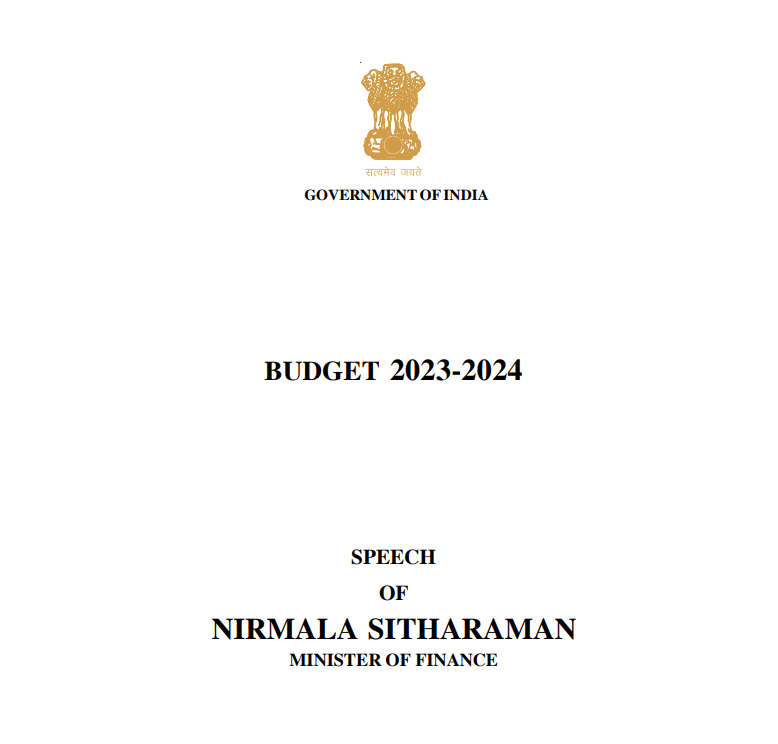



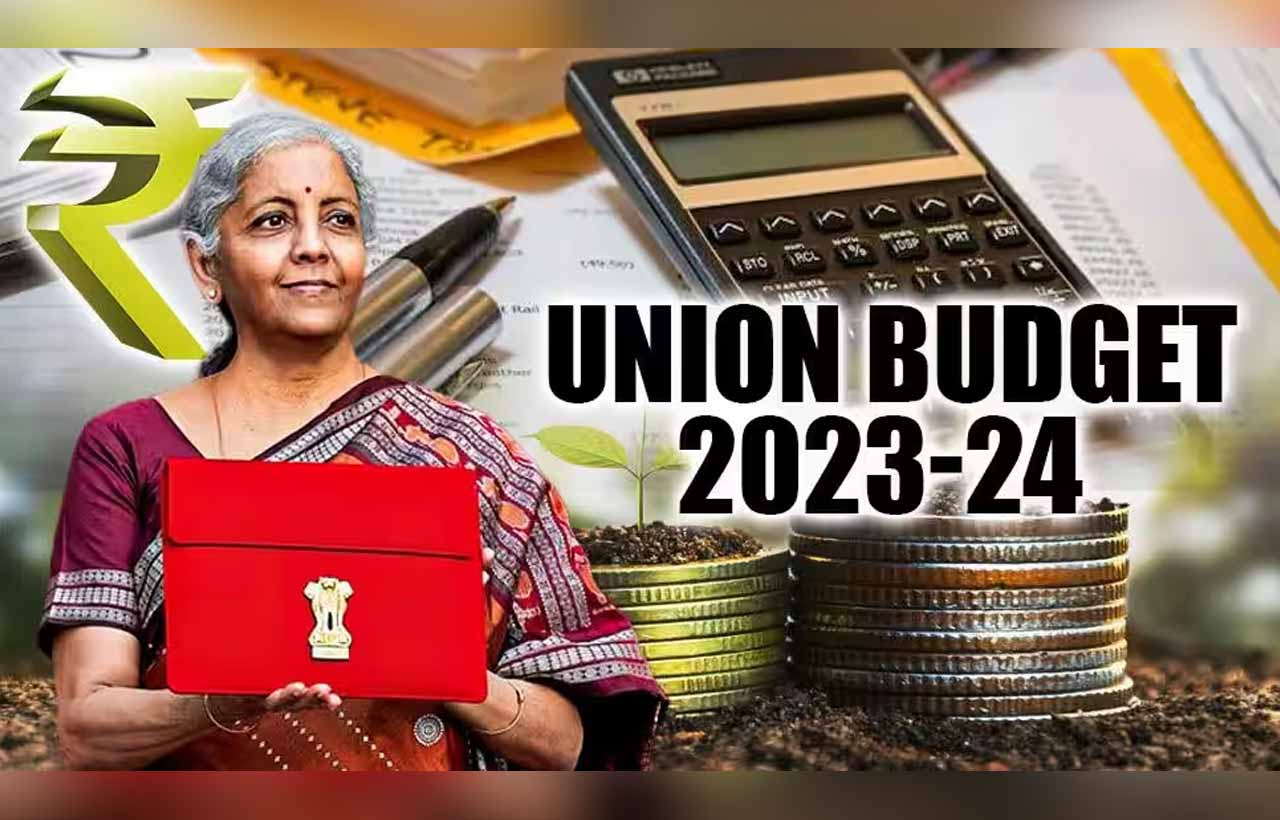



Submitted to: Prof.(Dr) Siby Abraham

Submitted by: Team 8

Team members:
    
          Akshay Shah(B006)

          Arun Raj Anandarajan(B013)

          Meet Sisodia(B027)

          Palak Agarwal(B031)

          Riya Maheshwari(B036)
          
#### Business case

The analysis of the Indian and US budgets is a critical task for businesses and policymakers seeking to understand the economic and political landscape of these countries. The Indian and US economies are two of the largest and most influential in the world, and their budgets have far-reaching impacts on global markets and business operations.

By analyzing the Indian and US budgets, businesses can gain insights into government priorities, anticipate changes in economic policies, and identify potential opportunities and risks. This analysis can inform business strategy and decision-making, enabling companies to navigate complex regulatory and economic environments more effectively.

          
#### Problem statment:

The analysis of the Indian and US budgets using NLP poses challenges due to the complexity of the language used, errors or inconsistencies in the text, and potential political bias or manipulation. The challenge is to develop NLP models that can accurately analyze the budgets, taking into account the technical terms and jargon, while being adaptable to changes in the economic and political landscape.


#### Info about the dataset:

Indian BUDGET 2023-2024 - SPEECH OF NIRMALA SITHARAMAN, MINISTER OF FINANCE
58 pages &  84278 words

Indian BUDGET 2022-2023 - SPEECH OF NIRMALA SITHARAMAN, MINISTER OF FINANCE
38 pages &  63788 words

US BUDGET 2022-2023 - OFFICE OF MANAGEMENT AND BUDGET, THE WHITE HOUSE
158 pages &  399693 words

In [1]:
# Standard libraries for analysing data
import spacy
import string
import pandas as pd
from collections import Counter
import re

# For visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# For PDF reading
import PyPDF2
import fitz

# For text analysis & NLP
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.matcher import Matcher
from spacy.matcher import PhraseMatcher
import spacy

# For sentiment analysis
from textblob import TextBlob

# For word cloud creation
from wordcloud import WordCloud

# For topic modelling
from gensim.corpora import Dictionary
from gensim.similarities import MatrixSimilarity
from gensim.models import TfidfModel
from gensim.matutils import corpus2dense
from gensim.corpora import Dictionary
import gensim
import pyLDAvis
import pyLDAvis.gensim_models


C:\Users\asus\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## Load the Pdf file

In [2]:


# Open the PDF file in read-binary mode
with open('budget_speech.pdf', 'rb') as pdf_file:

    # Create a PDF reader object
    pdf_reader = PyPDF2.PdfReader(pdf_file)

    # Read the PDF content and display it
    for page in range(len(pdf_reader.pages)):
        text = pdf_reader.pages[page].extract_text()
        print(text)

# Close the PDF file
pdf_file.close()

GOVERNMENT OF INDIA
BUDGET 2023-2024
SPEECH
OF
NIRMALA SITHARAMAN
MINISTER OF FINANCE
February 1,  2023

CONTENTS 
PART-A 
 Page No.  
 Introduction 1 
 Achievements since 2014: Leaving no one behind 2 
 Vision for Amrit Kaal  – an empowered and inclusive economy 3 
 Priorities of this Budget 5 
i. Inclusive Development  
ii. Reaching the Last Mile 
iii. Infrastructure and Investment 
iv. Unleashing the Potential 
v. Green Growth 
vi. Youth Power  
vii. Financial Sector  
 
 
 
 
 
 
 
 
 Fiscal Management 24 
PART B  
  
Indirect Taxes  27 
 Green Mobility  
 Electronics   
 Electrical   
 Chemicals and Petrochemicals   
 Marine products  
 Lab Grown Diamonds  
 Precious Metals  
 Metals  
 Compounded Rubber  
 Cigarettes  
  
Direct Taxes  30 
 MSMEs and Professionals   
 Cooperation  
 Start-Ups  
 Appeals  
 Better targeting of tax concessions  
 Rationalisation  
 Others  
 Personal Income Tax  
  
Annexures  35 
 Annexure to Part B of the Budget Speech 202

In [3]:
doc1=fitz.open('budget_speech.pdf')
doc1

Document('budget_speech.pdf')

# Pre-processing of Doc

In [4]:
output1 = ""
for page in doc1:
    text=page.get_text()
    output1 =" ".join([output1, text])

In [5]:
text=" ".join(output1.split())

text = text.translate(str.maketrans('', '', string.punctuation))

text=text.replace('•','')


In [6]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(text)

In [7]:

doc = nlp(text)

char_to_remove = ""

new_text = ""
for token in doc:
    if token.text != char_to_remove:
        new_text += token.text + token.whitespace_



## Total Number of Words

In [8]:
word_count = len(new_text)

# print the word count
print("Word count:", word_count)

Word count: 84278


## Tokenisation

In [9]:

text = new_text
doc = nlp(new_text)

# Tokenize the text
tkn = [token.text for token in doc]



In [10]:


stop_count=0
n_stop_count=0
punct_count=0
n_punct_count=0
left_punct_count=0
right_punct_count=0
alpha_count=0
digit_count=0
lower_case_count=0
upper_case_count=0
title_case_count=0
brack_count=0
q_count=0
num_count=0

# Check if the token is a stop word
for token in doc:
    if token.is_stop==True:
        stop_count=stop_count+1
print('\n The count of stop tokens:', stop_count)  

# Check if the token is non-stop words 
for token in doc:
    if token.is_stop==False:
        n_stop_count=n_stop_count+1
print('\n The count of non-stop tokens:', n_stop_count)  

# Check if the token is punctuation
for token in doc:
    if token.is_punct==True:
        punct_count=punct_count+1
print('\n The count of punctuation tokens:', punct_count)

for token in doc:
    if token.is_punct==False:
        n_punct_count=n_punct_count+1
print('\n The count of non-punctuation tokens:', n_punct_count)

for token in doc:
    if token.is_left_punct==True:
        left_punct_count=left_punct_count+1
print('\n The count of left punctuation tokens:', left_punct_count) 

for token in doc:
    if token.is_right_punct==True:
        right_punct_count=right_punct_count+1
print('\n The count of right punctuation tokens:', right_punct_count)

# Check if the token is alphabetic
for token in doc:
    if token.is_alpha==True:
        alpha_count=alpha_count+1
print('\n The count of alphabet-tokens:', alpha_count)

# Check if the token is digit
for token in doc:
    if token.is_digit==True:
        digit_count=digit_count+1
print('\n The count of digit tokens:', digit_count)

for token in doc:
    if token.is_lower==True:
        lower_case_count=lower_case_count+1
print('\n The count of lower case tokens:', lower_case_count)

for token in doc:
    if token.is_upper==True:
        upper_case_count=upper_case_count+1
print('\n The count of upper case tokens:', upper_case_count)

for token in doc:
    if token.is_title==True:
        title_case_count=title_case_count+1
print('\n The count of title case tokens:', title_case_count)

for token in doc:
    if token.is_bracket==True:
        brack_count=brack_count+1
print('\n The count of bracket tokens:', brack_count)

for token in doc:
    if token.is_quote==True:
        q_count=q_count+1
print('\n The count of quote tokens:', q_count)

for token in doc:
    if token.like_num==True:
        num_count=num_count+1
print('\n The count of num tokens:', num_count)



 The count of stop tokens: 5640

 The count of non-stop tokens: 8450

 The count of punctuation tokens: 93

 The count of non-punctuation tokens: 13997

 The count of left punctuation tokens: 39

 The count of right punctuation tokens: 46

 The count of alphabet-tokens: 12943

 The count of digit tokens: 770

 The count of lower case tokens: 10724

 The count of upper case tokens: 482

 The count of title case tokens: 2012

 The count of bracket tokens: 0

 The count of quote tokens: 85

 The count of num tokens: 862


## Creating a dataframe

In [11]:
# Create a dictionary of the counts for each type of token
token_counts_dict = {'token_name':['stop','non-stop','punct','non-punct', 'left-punct', 'right-punct', 'alpha', 'digit','lower-case', 'upper-case', 'title-case', 'bracket', 'quote', 'number'],
                     'token_counts': [stop_count, n_stop_count, punct_count, n_punct_count, left_punct_count, right_punct_count, alpha_count, digit_count, lower_case_count, upper_case_count, title_case_count, brack_count, q_count, num_count]}
  

# Create a DataFrame from the dictionary
df = pd.DataFrame(token_counts_dict)

# Display the DataFrame
print(df)

     token_name  token_counts
0          stop          5640
1      non-stop          8450
2         punct            93
3     non-punct         13997
4    left-punct            39
5   right-punct            46
6         alpha         12943
7         digit           770
8    lower-case         10724
9    upper-case           482
10   title-case          2012
11      bracket             0
12        quote            85
13       number           862


### Dropping punctuations

In [12]:

text = new_text
doc = nlp(new_text)

# Remove punctuation and whitespace tokens
tokens = [token for token in doc if not token.is_punct and not token.is_space]

# Join remaining tokens to form a string without punctuation
clean_text = ' '.join([token.text for token in tokens])



### Dropping Numerical tokens and stop words

In [13]:

doc = nlp(clean_text)
filtered_text = []
for token in doc:
    if not token.is_stop and not token.is_digit:
        filtered_text.append(token.text)
# join the filtered text
clean_text = " ".join(filtered_text)

print(clean_text)


GOVERNMENT INDIA BUDGET SPEECH NIRMALA SITHARAMAN MINISTER FINANCE February CONTENTS PARTA Page Introduction Achievements Leaving Vision Amrit Kaal empowered inclusive economy Priorities Budget Inclusive Development ii Reaching Mile iii Infrastructure Investment iv Unleashing Potential v Green Growth vi Youth Power vii Financial Sector Fiscal Management B Indirect Taxes Green Mobility Electronics Electrical Chemicals Petrochemicals Marine products Lab Grown Diamonds Precious Metals Metals Compounded Rubber Cigarettes Direct Taxes MSMEs Professionals Cooperation StartUps Appeals Better targeting tax concessions Rationalisation Personal Income Tax Annexures Annexure B Budget Speech Amendments relating Direct Taxes ii Amendments relating Indirect Taxes Budget Speech Nirmala Sitharaman Minister Finance February Hon’ble Speaker present Budget Budget Amrit Kaal Introduction Budget hopes build foundation laid previous Budget blueprint drawn India100 envision prosperous inclusive India fruits 

### Dataframe after removal of unwanted elements

In [14]:


# Create a Doc object from clean_text
doc = nlp(clean_text)

# Initialize counts
stop_count = 0
n_stop_count = 0
punct_count = 0
n_punct_count = 0
left_punct_count = 0
right_punct_count = 0
alpha_count = 0
digit_count = 0
lower_case_count = 0
upper_case_count = 0
title_case_count = 0
brack_count = 0
q_count = 0
num_count = 0

# Check if the token is a stop word
for token in doc:
    if token.is_stop:
        stop_count += 1
print('The count of stop tokens:', stop_count)

# Check if the token is non-stop words 
for token in doc:
    if not token.is_stop:
        n_stop_count += 1
print('The count of non-stop tokens:', n_stop_count)

# Check if the token is punctuation
for token in doc:
    if token.is_punct:
        punct_count += 1
print('The count of punctuation tokens:', punct_count)

for token in doc:
    if not token.is_punct:
        n_punct_count += 1
print('The count of non-punctuation tokens:', n_punct_count)

for token in doc:
    if token.is_left_punct:
        left_punct_count += 1
print('The count of left punctuation tokens:', left_punct_count) 

for token in doc:
    if token.is_right_punct:
        right_punct_count += 1
print('The count of right punctuation tokens:', right_punct_count)

# Check if the token is alphabetic
for token in doc:
    if token.is_alpha:
        alpha_count += 1
print('The count of alphabet-tokens:', alpha_count)

# Check if the token is digit
for token in doc:
    if token.is_digit:
        digit_count += 1
print('The count of digit tokens:', digit_count)

for token in doc:
    if token.is_lower:
        lower_case_count += 1
print('The count of lower case tokens:', lower_case_count)

for token in doc:
    if token.is_upper:
        upper_case_count += 1
print('The count of upper case tokens:', upper_case_count)

for token in doc:
    if token.is_title:
        title_case_count += 1
print('The count of title case tokens:', title_case_count)

for token in doc:
    if token.is_bracket:
        brack_count += 1
print('The count of bracket tokens:', brack_count)

for token in doc:
    if token.is_quote:
        q_count += 1
print('The count of quote tokens:', q_count)

for token in doc:
    if token.like_num:
        num_count+1
print('\n The count of num tokens:', num_count)


The count of stop tokens: 0
The count of non-stop tokens: 7448
The count of punctuation tokens: 0
The count of non-punctuation tokens: 7448
The count of left punctuation tokens: 0
The count of right punctuation tokens: 0
The count of alphabet-tokens: 7318
The count of digit tokens: 0
The count of lower case tokens: 5554
The count of upper case tokens: 406
The count of title case tokens: 1561
The count of bracket tokens: 0
The count of quote tokens: 0

 The count of num tokens: 0


In [15]:
# Create a dictionary of the counts for each type of token
token_counts_dict = {'token_name':['stop','non-stop','punct','non-punct', 'left-punct', 'right-punct', 'alpha', 'digit','lower-case', 'upper-case', 'title-case', 'bracket', 'quote', 'number'],
                     'token_counts': [stop_count, n_stop_count, punct_count, n_punct_count, left_punct_count, right_punct_count, alpha_count, digit_count, lower_case_count, upper_case_count, title_case_count, brack_count, q_count, num_count]}
  

# Create a DataFrame from the dictionary
df = pd.DataFrame(token_counts_dict)

# Display the DataFrame
print(df)

     token_name  token_counts
0          stop             0
1      non-stop          7448
2         punct             0
3     non-punct          7448
4    left-punct             0
5   right-punct             0
6         alpha          7318
7         digit             0
8    lower-case          5554
9    upper-case           406
10   title-case          1561
11      bracket             0
12        quote             0
13       number             0


## Parts of speech


In [16]:
cols=['Token','POS','Explain_POS','TAG','Explain_TAG']
cols

['Token', 'POS', 'Explain_POS', 'TAG', 'Explain_TAG']

In [17]:
doc = nlp(' '.join(filtered_text))
rows = []
for token in doc:
    row = token.text, token.pos_, spacy.explain(token.pos_), token.tag_, spacy.explain(token.tag_)
    rows.append(row)
rows


[('GOVERNMENT', 'PROPN', 'proper noun', 'NNP', 'noun, proper singular'),
 ('INDIA', 'PROPN', 'proper noun', 'NNP', 'noun, proper singular'),
 ('BUDGET', 'PROPN', 'proper noun', 'NNP', 'noun, proper singular'),
 ('SPEECH', 'PROPN', 'proper noun', 'NNP', 'noun, proper singular'),
 ('NIRMALA', 'PROPN', 'proper noun', 'NNP', 'noun, proper singular'),
 ('SITHARAMAN', 'PROPN', 'proper noun', 'NNP', 'noun, proper singular'),
 ('MINISTER', 'PROPN', 'proper noun', 'NNP', 'noun, proper singular'),
 ('FINANCE', 'PROPN', 'proper noun', 'NNP', 'noun, proper singular'),
 ('February', 'PROPN', 'proper noun', 'NNP', 'noun, proper singular'),
 ('CONTENTS', 'NOUN', 'noun', 'NNS', 'noun, plural'),
 ('PARTA', 'PROPN', 'proper noun', 'NNP', 'noun, proper singular'),
 ('Page', 'PROPN', 'proper noun', 'NNP', 'noun, proper singular'),
 ('Introduction', 'NOUN', 'noun', 'NN', 'noun, singular or mass'),
 ('Achievements', 'PROPN', 'proper noun', 'NNP', 'noun, proper singular'),
 ('Leaving', 'VERB', 'verb', 'VBG',

In [18]:
# converting into df

token_df=pd.DataFrame(rows,columns=cols)
token_df

Token    POS  Explain_POS  TAG  \
0     GOVERNMENT  PROPN  proper noun  NNP   
1          INDIA  PROPN  proper noun  NNP   
2         BUDGET  PROPN  proper noun  NNP   
3         SPEECH  PROPN  proper noun  NNP   
4        NIRMALA  PROPN  proper noun  NNP   
...          ...    ...          ...  ...   
7443  Memorandum  PROPN  proper noun  NNP   
7444    relevant    ADJ    adjective   JJ   
7445      budget   NOUN         noun   NN   
7446   documents   NOUN         noun  NNS   
7447    referred   VERB         verb  VBD   

                                            Explain_TAG  
0                                 noun, proper singular  
1                                 noun, proper singular  
2                                 noun, proper singular  
3                                 noun, proper singular  
4                                 noun, proper singular  
...                                                 ...  
7443                              noun, proper singular  
7444  adjective (English), other noun-modifier (Chin...  
7445                             noun, singular or mass  
7446                                       noun, plural  
7447                                   verb, past tense  

[7448 rows x 5 columns]

In [19]:
# count of each POS

token_df['POS'].value_counts()

NOUN     3278
PROPN    1788
VERB     1291
ADJ       905
ADV        85
AUX        35
X          19
NUM        16
ADP        14
SCONJ       6
PRON        6
PUNCT       3
INTJ        2
Name: POS, dtype: int64

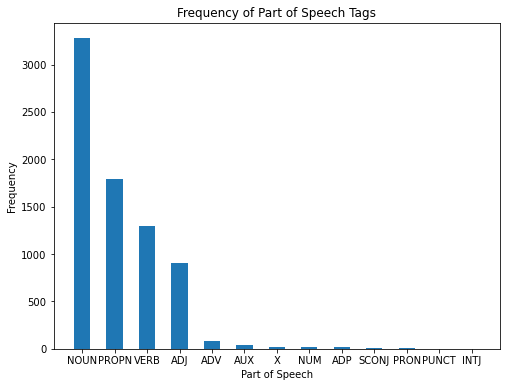

In [20]:


# create a frequency table for POS tags
pos_counts = token_df['POS'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(pos_counts.index, pos_counts.values, width=0.5)

plt.xlabel('Part of Speech')
plt.ylabel('Frequency')
plt.title('Frequency of Part of Speech Tags')
plt.show()


# NER

In [21]:


# process the text with the NLP pipeline
doc = nlp(clean_text)

# iterate over the entities detected in the document
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

GOVERNMENT INDIA BUDGET SPEECH 0 30 ORG
February 67 75 DATE
Kaal 143 147 PERSON
Priorities Budget Inclusive Development ii 176 218 ORG
Financial Sector Fiscal Management B Indirect Taxes Green Mobility Electronics Electrical Chemicals Petrochemicals Marine 321 442 ORG
Rationalisation Personal Income Tax Annexures Annexure B Budget Speech Amendments 618 699 ORG
Direct Taxes ii Amendments 709 735 ORG
Nirmala Sitharaman 774 792 PERSON
Finance 802 809 PERSON
February 810 818 DATE
Budget Budget 843 856 ORG
Budget 925 931 ORG
India 987 992 GPE
75th year 1105 1114 DATE
Indian 1145 1151 NORP
year 1180 1184 DATE
Indian 1299 1305 NORP
Today 1372 1377 DATE
Indians 1378 1385 NORP
India 1426 1431 GPE
India 1474 1479 GPE
Resilience 1527 1537 PERSON
Sabka Prayas 1614 1626 ORG
Jan Bhagidari 1637 1650 PERSON
India 1701 1706 GPE
CoWin UPI Covid 1805 1820 PERSON
LiFE National Hydrogen Mission 1934 1964 ORG
months 2051 2057 DATE
1st 2126 2129 DATE
January 2130 2137 DATE
Antyodaya 2168 2177 ORG
year PM 219

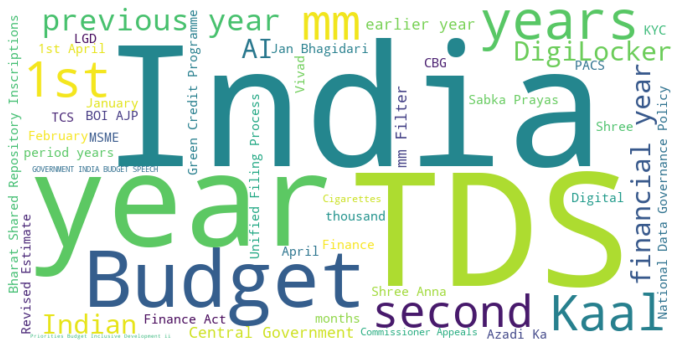

In [22]:

# collect all named entities in a list
ner_list = [ent.text for ent in doc.ents]

# count the frequency of each entity
ner_freq = Counter(ner_list)

# create a word cloud from the most common entities
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(ner_freq)

# plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Named Entity analysis    

In [23]:
ent_word = []
ent_label = []
for ent in doc.ents:
    ent_word.append(ent.text)
    ent_label.append(ent.label_)
ent_counter = Counter(ent_label)
ent_counter

Counter({'ORG': 264,
         'DATE': 62,
         'PERSON': 95,
         'GPE': 27,
         'NORP': 15,
         'ORDINAL': 10,
         'CARDINAL': 23,
         'FAC': 5,
         'LANGUAGE': 1,
         'WORK_OF_ART': 18,
         'PRODUCT': 32,
         'MONEY': 3,
         'TIME': 1,
         'QUANTITY': 2,
         'LAW': 3})

         Label  Frequency
0          ORG        264
1       PERSON         95
2         DATE         62
3      PRODUCT         32
4          GPE         27
5     CARDINAL         23
6  WORK_OF_ART         18
7         NORP         15
8      ORDINAL         10
9          FAC          5


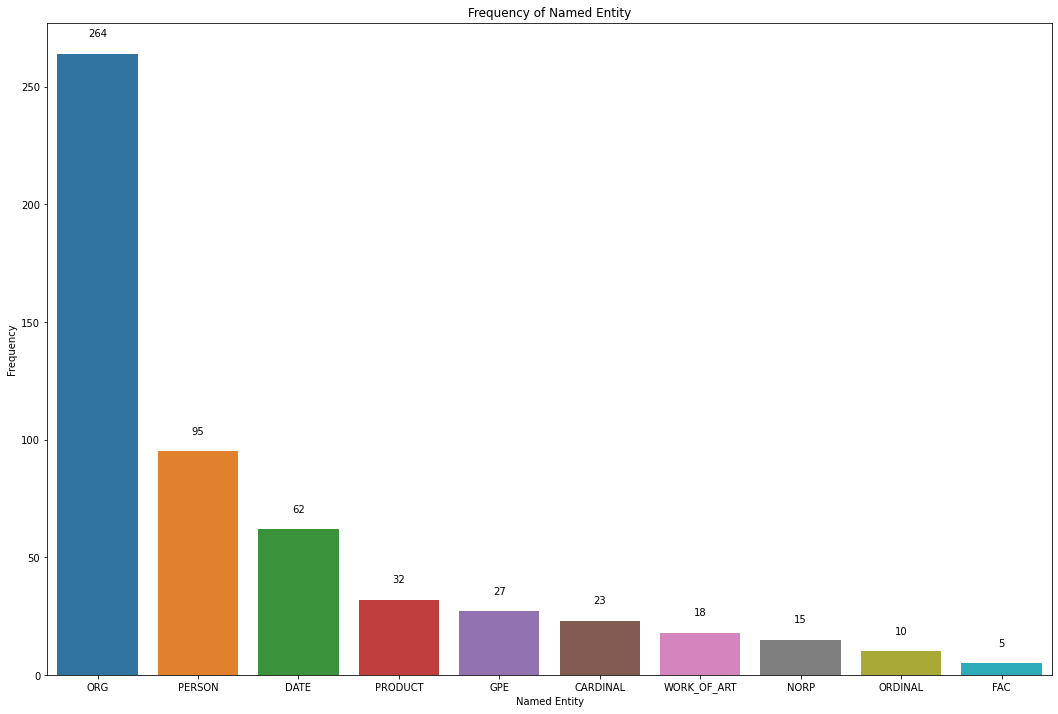

In [24]:
ent_labels =[key for key, _ in ent_counter.most_common(10)]
ent_count = [value for _, value in ent_counter.most_common(10)]
ent_df = pd.DataFrame(list(zip(ent_labels, ent_count)), columns =['Label', 'Frequency'])
ent_df.set_index('Label')
print(ent_df)

# set the figure size
fig, ax = plt.subplots(figsize=(18, 12))
barchart = sns.barplot(x=ent_df["Label"], y=ent_df["Frequency"], ax=ax)


barchart.bar_label(ax.containers[0], label_type='edge', padding=15);

plt.xlabel('Named Entity')
plt.ylabel('Frequency')
plt.title('Frequency of Named Entity')
plt.show()

           Label  Frequency
0          India         15
1            TDS         13
2           year          8
3         Budget          6
4          years          6
5           Kaal          5
6            1st          5
7             mm          5
8         second          4
9  previous year          4


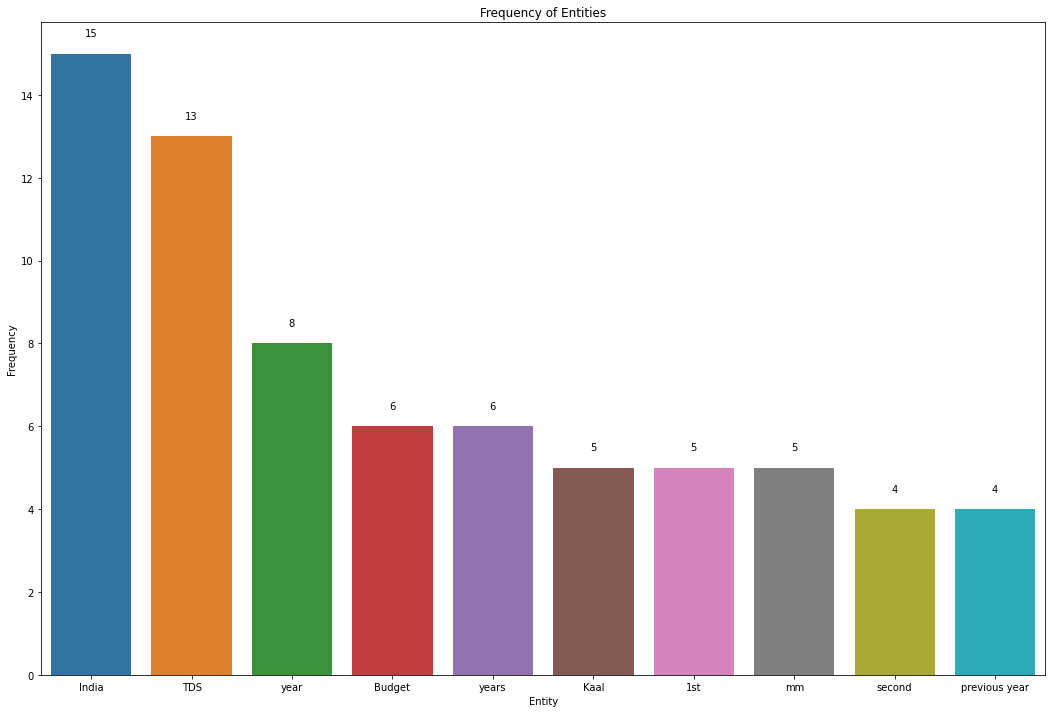

In [25]:
ent_word_counter = Counter(ent_word)
ent_labels =[key for key, _ in ent_word_counter.most_common(10)]
ent_count = [value for _, value in ent_word_counter.most_common(10)]
ent_df = pd.DataFrame(list(zip(ent_labels, ent_count)), columns =['Label', 'Frequency'])
ent_df.set_index('Label')
print(ent_df)

# set the figure size
fig, ax = plt.subplots(figsize=(18, 12))
barchart = sns.barplot(x=ent_df["Label"], y=ent_df["Frequency"], ax=ax)


barchart.bar_label(ax.containers[0], label_type='edge', padding=15);

plt.xlabel('Entity')
plt.ylabel('Frequency')
plt.title('Frequency of Entities')
plt.show()

# WordCloud

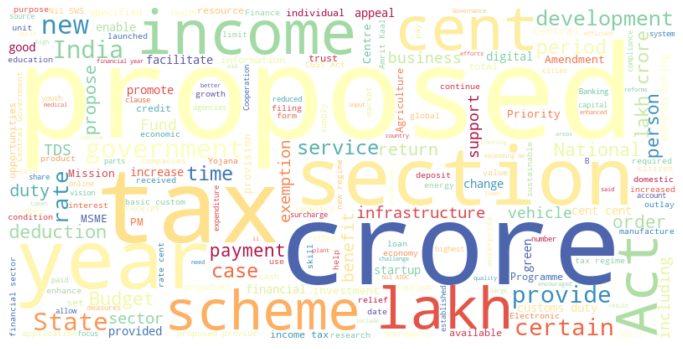

In [26]:

# Convert filtered_text to a string
text = ' '.join(filtered_text)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Spectral', stopwords=None).generate(text)

# Plot the word cloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Sentiment Analysis

In [27]:

blob = TextBlob(clean_text)

In [28]:
blob.sentiment

Sentiment(polarity=0.07952162522791885, subjectivity=0.3517210462420265)

# Topic Modelling

In [29]:
doc = nlp(" ".join(filtered_text))
text_words = []
for token in doc:
    if token.is_stop == False and token.is_punct == False and token.like_num == False and token.text not in ['\n','/','|','•',' ',]:
        text_words.append(token.lemma_)


In [30]:
texts = [text_words]

### Creating a corpus

In [31]:
corpus = []

dict_1 = Dictionary(texts)

In [32]:
for words in texts:
    corpus.append(dict_1.doc2bow(words))
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 2), (24, 1), (25, 1), (26, 4), (27, 12), (28, 3), (29, 1), (30, 3), (31, 1), (32, 1), (33, 1), (34, 3), (35, 1), (36, 2), (37, 2), (38, 2), (39, 1), (40, 57), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 2), (50, 1), (51, 3), (52, 7), (53, 1), (54, 1), (55, 3), (56, 7), (57, 1), (58, 14), (59, 2), (60, 1), (61, 6), (62, 3), (63, 1), (64, 1), (65, 2), (66, 1), (67, 1), (68, 1), (69, 3), (70, 3), (71, 1), (72, 2), (73, 6), (74, 1), (75, 2), (76, 2), (77, 1), (78, 3), (79, 1), (80, 1), (81, 1), (82, 1), (83, 2), (84, 6), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 2), (91, 1), (92, 2), (93, 2), (94, 2), (95, 2), (96, 1), (97, 1), (98, 3), (99, 1), (100, 1), (101, 1), (102, 5), (103, 4), (104, 1), (105, 1), (106, 2), (107, 1), (108, 1), (109, 1), (110,

### Creating an LDA Model

In [33]:
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=5, id2word=dict_1)

In [34]:
lda.print_topics()

[(0,
  '0.014*"propose" + 0.009*"tax" + 0.009*"lakh" + 0.009*"cent" + 0.009*"crore" + 0.006*"Act" + 0.006*"year" + 0.005*"provide" + 0.005*"section" + 0.005*"duty"'),
 (1,
  '0.009*"propose" + 0.008*"cent" + 0.007*"provide" + 0.007*"crore" + 0.006*"Act" + 0.006*"tax" + 0.005*"year" + 0.005*"lakh" + 0.004*"income" + 0.004*"new"'),
 (2,
  '0.012*"propose" + 0.010*"cent" + 0.009*"tax" + 0.009*"crore" + 0.006*"year" + 0.006*"income" + 0.006*"lakh" + 0.005*"provide" + 0.005*"new" + 0.004*"section"'),
 (3,
  '0.008*"propose" + 0.005*"crore" + 0.005*"provide" + 0.005*"tax" + 0.005*"cent" + 0.004*"lakh" + 0.004*"income" + 0.003*"Act" + 0.003*"year" + 0.003*"duty"'),
 (4,
  '0.011*"propose" + 0.008*"tax" + 0.008*"cent" + 0.008*"Act" + 0.007*"crore" + 0.007*"provide" + 0.007*"lakh" + 0.006*"year" + 0.005*"income" + 0.003*"increase"')]

In [35]:
pyLDAvis.enable_notebook()
plot = pyLDAvis.gensim_models.prepare(lda, corpus=corpus, dictionary= lda.id2word)

C:\Users\asus\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [36]:
plot

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.004137  0.001497       1        1  75.505243
2      0.002945 -0.002524       2        1  22.896835
4      0.001544  0.001213       3        1   1.592431
1     -0.001454 -0.000343       4        1   0.002756
3     -0.007171  0.000158       5        1   0.002735, topic_info=             Term        Freq       Total Category  logprob  loglift
1980      propose  100.000000  100.000000  Default  30.0000  30.0000
973          cent   65.000000   65.000000  Default  29.0000  29.0000
1126        crore   63.000000   63.000000  Default  28.0000  28.0000
2296          tax   66.000000   66.000000  Default  27.0000  27.0000
1621         lakh   60.000000   60.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
1104  cooperative    0.000377   18.305078   Topic5  -6.2885  -0.2836
2328         time    0.000375   18.564167   Topic5  -6.2933  -0.3024
2142       scheme    0.000379   22.392883   Topic5  -6.2832  -0.4799
1193  development    0.000376   23.358028   Topic5  -6.2917  -0.5306
2153      section    0.000384   35.965992   Topic5  -6.2692  -0.9397

[397 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
6         1  0.790341     194R
40        1  0.810666      Act
40        2  0.157629      Act
40        3  0.022518      Act
58        1  0.685447    Amrit
...     ...       ...      ...
2445      1  0.809975  wetland
2452      1  0.775025  winning
2461      1  0.744919     year
2461      2  0.241003     year
2461      3  0.021909     year

[391 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 2, 4])

# Entity Matching

In [37]:
matcher_1 = Matcher(nlp.vocab)
pattern_1 = [{'ENT_TYPE': 'PERSON'}]
## add pattern to object
matcher_1.add("patter_1_name", [pattern_1])
match_1 = matcher_1(doc)
print(len(match_1))
matched_entity = []
for match_id, start, end in match_1:
    span = doc[start:end]
    matched_entity.append(span)
print(Counter(matched_entity))

190
Counter({Kaal: 1, Nirmala: 1, Sitharaman: 1, Finance: 1, Resilience: 1, Jan: 1, Bhagidari: 1, CoWin: 1, UPI: 1, Covid: 1, Garib: 1, Kalyan: 1, G20: 1, Ujjawala: 1, Covid: 1, PM: 1, Suraksha: 1, Jeevan: 1, Jyoti: 1, Yojana: 1, Kaal: 1, Kaal: 1, Jan: 1, Bhagidari: 1, Self: 1, Help: 1, Groups: 1, Unicorns: 1, PM: 1, VIshwakarma: 1, KAushal: 1, Samman: 1, Vishwakarma: 1, Atmanirbhar: 1, Bharat: 1, Sabka: 1, Saath: 1, Sabka: 1, Vikas: 1, ko: 1, variyata: 1, Anna: 1, India: 1, Shree: 1, Anna: 1, bajra: 1, kuttu: 1, Shree: 1, Anna: 1, Sahakar: 1, Se: 1, Samriddhi: 1, RD: 1, Vajpayee: 1, Eklavya: 1, Model: 1, Residential: 1, Harmonized: 1, Master: 1, List: 1, Infrastructure: 1, Kaal: 1, Railways: 1, Tier: 1, Tier: 1, Vishwas: 1, Bill: 1, KYC: 1, Aadhaar: 1, PM: 1, Jan: 1, Dhan: 1, Ladakh: 1, Dharohar: 1, Wetlands: 1, Mann: 1, Ki: 1, Dharohar: 1, Mantri: 1, Kaushal: 1, skill: 1, lakhs: 1, years: 1, Onjob: 1, Dekho: 1, Apna: 1, Desh: 1, Swadesh: 1, Darshan: 1, Scheme: 1, Kaal: 1, IFSCA: 1, A

## Text matching

In [38]:
doc = nlp(clean_text)

Central_count = len(re.findall(r'\bcentral\b', doc.text))
State_count = len(re.findall(r'\bstate\b', doc.text))
Education_count = len(re.findall(r'\bEducation\b', doc.text))
Cigarettes_count = len(re.findall(r'\bCigarettes\b', doc.text))
Data_count = len(re.findall(r'\bData\b', doc.text))
Corruption_count = len(re.findall(r'\bCorruption\b', doc.text))
AI_count = len(re.findall(r'\bAI\b', doc.text))


print("Central count:", Central_count)
print("State count:", State_count)
print("Education count:",Education_count)
print("Cigarettes count:",Cigarettes_count)
print("Data count:",Data_count)
print("Corruption count:",Corruption_count)
print("AI count:",AI_count)

Central count: 8
State count: 4
Education count: 4
Cigarettes count: 4
Data count: 5
Corruption count: 0
AI count: 4


## Phrase Matching

In [39]:


matcher = PhraseMatcher(nlp.vocab)
phrases = ['Artificial Intelligence', 'inclusive development', 'Sustainable Development', 'Girl Child']
patterns = [nlp(text) for text in phrases]
matcher.add('PHRASE_MATCH', None, *patterns)
matches = matcher(doc)
matched_phrases = [doc[start:end].text for _, start, end in matches]
phrase_counts = Counter(matched_phrases)
print(phrase_counts)


Counter({'inclusive development': 2, 'Artificial Intelligence': 2, 'Sustainable Development': 1})


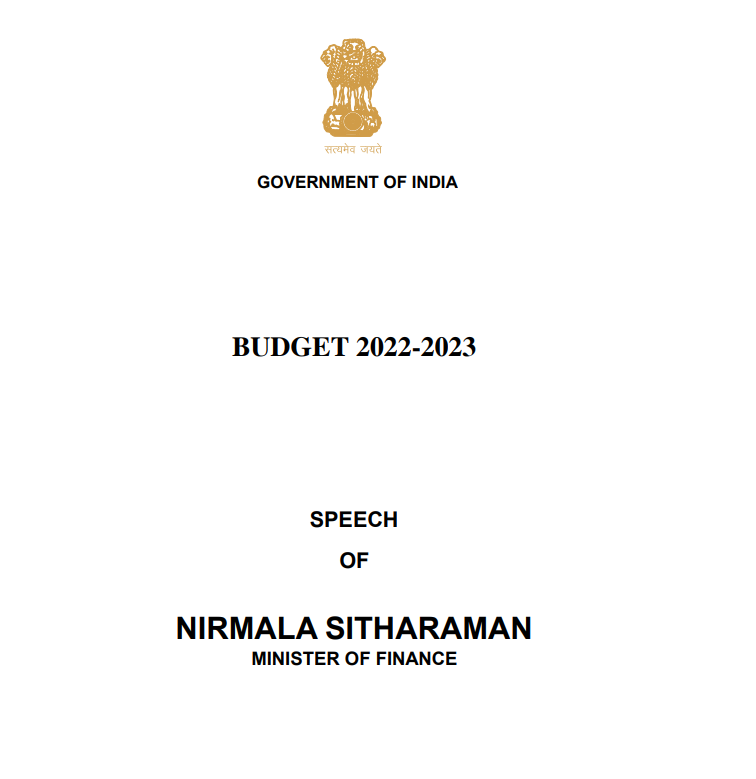


In [40]:

# Open the PDF file in read-binary mode
with open('Budget_Speech_22.pdf', 'rb') as pdf_file2:

    # Create a PDF reader object
    pdf_reader = PyPDF2.PdfReader(pdf_file2)

    # Read the PDF content and display it
    for page in range(len(pdf_reader.pages)):
        text = pdf_reader.pages[page].extract_text()
        print(text)

# Close the PDF file
pdf_file2.close()

GOVERNMENT OF INDIA
BUDGET 2022-2023
SPEECH
OF
NIRMALA SITHARAMAN
MINISTER OF FINANCE
February 1,  2022

CONTENTS  
PART -A 
 Page No.  
 Introduction  1 
 PM GatiShakti  3 
 Inclusive Development  5 
 Productivity Enhancement & Investment , Sunrise Opportunities, Energy 
Transition & Climate Action  11 
 Financing of Investments  17 
 Fiscal Management  20 
  
PART B 
Direct Tax Proposals  21 
 Introducing new ‘Updated return’   
 Reduced Alternate minimum tax rate and Surcharge for Cooperatives   
 Tax relief to persons with disability   
 Parity between employees of State and Central government   
 Incentives for Start -ups  
 Incentives for newly incorporated manufacturing entities under 
concessional tax regime   
 Scheme for taxation of virtual digital assets   
 Litigation management to avoid repetitive appeals by the Department   
 Tax incentives to IFSC   
 Rationalization of Surcharge   
 Clarification in relation to ‘Health and Education cess’ as business 
e

In [41]:
nlp=spacy.load('en_core_web_sm')
type(nlp)
doc2=fitz.open('Budget_Speech_22.pdf')
doc2

Document('Budget_Speech_22.pdf')

In [42]:
output2 = ""
for page in doc2:
    text2=page.get_text()
    output2 =" ".join([output2, text2])

In [43]:
text2=" ".join(output2.split())

text2 = text2.translate(str.maketrans('', '', string.punctuation))

text2=text2.replace('•','')



In [44]:
doc2=nlp(text2)


In [45]:
word_count = len(text2)

# print the word count
print("Word count:", word_count)

Word count: 63788


In [46]:
# Tokenisation
doc2 = nlp(text2)

# Tokenize the text
tkn2 = [token.text for token in doc2]



In [47]:
doc2 = nlp(doc2)

# Remove punctuation and whitespace tokens
tokens2 = [token for token in doc2 if not token.is_punct and not token.is_space]

# Join remaining tokens to form a string without punctuation
clean_text2 = ' '.join([token.text for token in tokens2])



In [48]:
doc2 = nlp(clean_text2)
filtered_text2 = []
for token in doc2:
    if not token.is_stop and not token.is_digit:
        filtered_text2.append(token.text)
# join the filtered text
clean_text2 = " ".join(filtered_text2)



# WordCloud

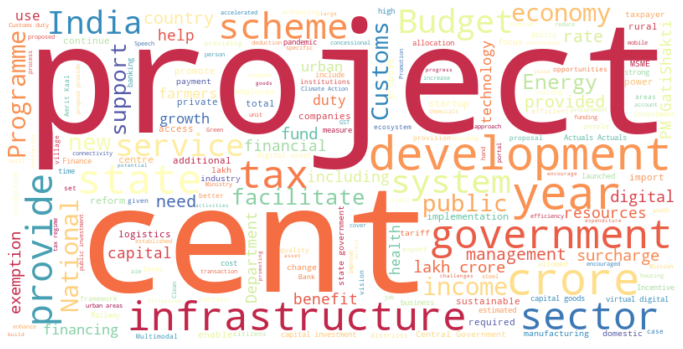

In [49]:



# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Spectral', stopwords=None).generate(clean_text2)

# Plot the word cloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Word Matching

In [50]:
doc2 = nlp(clean_text2)

Central_count = len(re.findall(r'\bcentral\b', doc2.text))
State_count = len(re.findall(r'\bstate\b', doc2.text))
Education_count = len(re.findall(r'\bEducation\b', doc2.text))
Cigarettes_count = len(re.findall(r'\bCigarettes\b', doc2.text))
Data_count = len(re.findall(r'\bData\b', doc2.text))
Corruption_count = len(re.findall(r'\bCorruption\b', doc2.text))
AI_count = len(re.findall(r'\bAI\b', doc2.text))


print("Central count:", Central_count)
print("State count:", State_count)
print("Education count:",Education_count)
print("Cigarettes count:",Cigarettes_count)
print("Data count:",Data_count)
print("Corruption count:",Corruption_count)
print("AI count:",AI_count)

Central count: 6
State count: 10
Education count: 6
Cigarettes count: 0
Data count: 1
Corruption count: 0
AI count: 0


# Phrase Matching

In [51]:
matcher = PhraseMatcher(nlp.vocab)
phrases = ['Artificial Intelligence', 'inclusive development', 'Sustainable Development', 'Girl Child']
patterns = [nlp(text) for text in phrases]
matcher.add('PHRASE_MATCH', None, *patterns)
matches = matcher(doc2)
matched_phrases = [doc2[start:end].text for _, start, end in matches]
phrase_counts = Counter(matched_phrases)
print(phrase_counts)


Counter({'Artificial Intelligence': 1})


# Sentiment Analysis

In [52]:
blob = TextBlob(clean_text2)

In [53]:
blob.sentiment

Sentiment(polarity=0.0745886869324369, subjectivity=0.3381298867236368)

# Topic Modelling

In [54]:
doc2 = nlp(" ".join(filtered_text2))
text_words2 = []
for token in doc2:
    if token.is_stop == False and token.is_punct == False and token.like_num == False and token.text not in ['\n','/','|','•',' ',]:
        text_words.append(token.lemma_)

In [55]:
texts2 = [text_words2]

In [56]:
corpus2 = []
dict_2 = Dictionary(texts)

for words in texts2:
    corpus2.append(dict_2.doc2bow(words))
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 2), (24, 1), (25, 1), (26, 4), (27, 12), (28, 3), (29, 1), (30, 3), (31, 1), (32, 1), (33, 1), (34, 3), (35, 1), (36, 2), (37, 2), (38, 2), (39, 1), (40, 57), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 2), (50, 1), (51, 3), (52, 7), (53, 1), (54, 1), (55, 3), (56, 7), (57, 1), (58, 14), (59, 2), (60, 1), (61, 6), (62, 3), (63, 1), (64, 1), (65, 2), (66, 1), (67, 1), (68, 1), (69, 3), (70, 3), (71, 1), (72, 2), (73, 6), (74, 1), (75, 2), (76, 2), (77, 1), (78, 3), (79, 1), (80, 1), (81, 1), (82, 1), (83, 2), (84, 6), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 2), (91, 1), (92, 2), (93, 2), (94, 2), (95, 2), (96, 1), (97, 1), (98, 3), (99, 1), (100, 1), (101, 1), (102, 5), (103, 4), (104, 1), (105, 1), (106, 2), (107, 1), (108, 1), (109, 1), (110,

In [57]:
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=5, id2word=dict_2)
pyLDAvis.enable_notebook()
plot = pyLDAvis.gensim_models.prepare(lda, corpus=corpus, dictionary= lda.id2word)

C:\Users\asus\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [58]:
plot

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.003437  0.001889       1        1  51.191332
4     -0.003314 -0.001955       2        1  48.800402
1      0.000983  0.000044       3        1   0.002760
3      0.002529  0.000140       4        1   0.002754
0      0.003239 -0.000118       5        1   0.002752, topic_info=            Term       Freq      Total Category  logprob  loglift
1980        feed  82.000000  82.000000  Default  30.0000  30.0000
973       Social  69.000000  69.000000  Default  29.0000  29.0000
2296        item  62.000000  62.000000  Default  28.0000  28.0000
1126  acceptance  50.000000  50.000000  Default  27.0000  27.0000
1621       court  49.000000  49.000000  Default  26.0000  26.0000
...          ...        ...        ...      ...      ...      ...
1104    Wetlands   0.000388  16.932847   Topic5  -6.2647  -0.1819
959        Shlok   0.000370  14.909398   Topic5  -6.3130  -0.1029
980      Special   0.000416  22.346375   Topic5  -6.1973  -0.3919
499        Grand   0.000384  19.812596   Topic5  -6.2754  -0.3497
1698       delay   0.000383  19.386029   Topic5  -6.2801  -0.3326

[445 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
11        1  0.852470          269SS
11        2  0.852470          269SS
26        1  0.635296             A5
26        2  0.635296             A5
40        1  0.518310             AY
...     ...       ...            ...
2426      2  0.444458     management
2439      1  0.843202  manufacturing
2439      2  0.843202  manufacturing
2461      1  0.414457      medicinal
2461      2  0.585116      medicinal

[447 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 2, 4, 1])

# US Budget Analysis

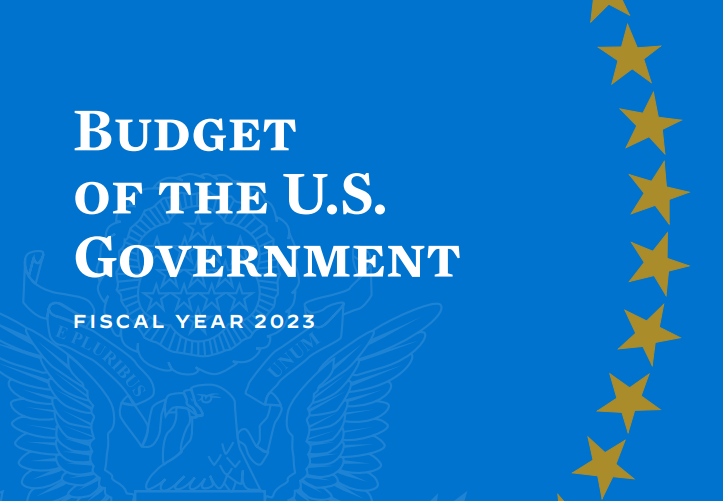

In [59]:
# Open the PDF file in read-binary mode
with open('US_Budget.pdf', 'rb') as pdf_file3:

    # Create a PDF reader object
    pdf_reader = PyPDF2.PdfReader(pdf_file3)

    # Read the PDF content and display it
    for page in range(len(pdf_reader.pages)):
        text = pdf_reader.pages[page].extract_text()
        print(text)

# Close the PDF file
pdf_file3.close()

OFFICE OF MANAGEMENT AND BUDGET
Budget
of the U.S.
Government
FISCAL YEAR 2023
OFFICE OF MANAGEMENT AND BUDGET
Budget
of the U.S.
Government
FISCAL YEAR 2023
Budget of the United States Government , 
Fiscal Year 2023 contains the Budget Message of the 
President, information on the President’s priorities, 
and summary tables.
Analytical Perspectives,  Budget of the United 
States Government, Fiscal Year 2023 contains anal -
yses that are designed to highlight specified subject 
areas or provide other significant presentations of 
budget data that place the budget in perspective.  
This volume includes economic and accounting anal -
yses, information on Federal receipts and collections, 
analyses of Federal spending, information on Federal 
borrowing and debt, baseline or current services es -
timates, and other technical presentations.  
Supplemental tables and other materials 
that are part of the Analytical Perspectives vol -
ume are available at https://whitehouse.gov/omb/
analytica

In [60]:
nlp=spacy.load('en_core_web_sm')
type(nlp)
doc3=fitz.open('US_Budget.pdf')
doc3

Document('US_Budget.pdf')

In [61]:
output3 = ""
for page in doc3:
    text3=page.get_text()
    output3 =" ".join([output3, text3])

text3=" ".join(output3.split())

text3 = text3.translate(str.maketrans('', '', string.punctuation))

text3=text3.replace('•','')



In [62]:
doc3=nlp(text3)


In [63]:
word_count = len(text3)

# print the word count
print("Word count:", word_count)

Word count: 399693


In [64]:
# Tokenisation
nlp = spacy.load('en_core_web_sm')
doc3 = nlp(text3)

# Tokenize the text
tkn3 = [token.text for token in doc3]



In [65]:
nlp = spacy.load('en_core_web_sm')
doc3 = nlp(doc3)

# Remove punctuation and whitespace tokens
tokens3 = [token for token in doc3 if not token.is_punct and not token.is_space]

# Join remaining tokens to form a string without punctuation
clean_text3 = ' '.join([token.text for token in tokens3])

print(clean_text3)

OFFICE OF MANAGEMENT AND BUDGET Budget of the US Government F I S C AL Y EAR 2023 OFFICE OF MANAGEMENT AND BUDGET Budget of the US Government FI S CAL Y EAR 2023 Budget of the United States Government Fiscal Year 2023 contains the Budget Message of the President information on the President ’s priorities and summary tables Analytical Perspectives Budget of the United States Government Fiscal Year 2023 contains anal yses that are designed to highlight specified subject areas or provide other significant presentations of budget data that place the budget in perspective This volume includes economic and accounting anal yses information on Federal receipts and collections analyses of Federal spending information on Federal borrowing and debt baseline or current services es timates and other technical presentations Supplemental tables and other materials that are part of the Analytical Perspectives vol ume are available at httpswhitehousegovomb analyticalperspectives Appendix Budget of the 

In [66]:
nlp = spacy.load('en_core_web_sm')
doc3 = nlp(clean_text3)
filtered_text3 = []
for token in doc3:
    if not token.is_stop and not token.is_digit:
        filtered_text3.append(token.text)
# join the filtered text
clean_text3 = " ".join(filtered_text3)

print(clean_text3)

OFFICE MANAGEMENT BUDGET Budget Government F S C AL Y EAR OFFICE MANAGEMENT BUDGET Budget Government FI S CAL Y EAR Budget United States Government Fiscal Year contains Budget Message President information President priorities summary tables Analytical Perspectives Budget United States Government Fiscal Year contains anal yses designed highlight specified subject areas provide significant presentations budget data place budget perspective volume includes economic accounting anal yses information Federal receipts collections analyses Federal spending information Federal borrowing debt baseline current services es timates technical presentations Supplemental tables materials Analytical Perspectives vol ume available httpswhitehousegovomb analyticalperspectives Appendix Budget United States Government Fiscal Year contains detailed formation appropriations funds constitute budget designed primarily use Appropriations Committees Appendix contains detailed financial informa tion individual p

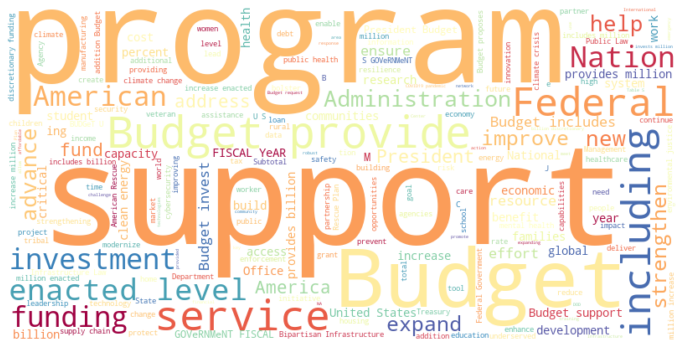

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Spectral', stopwords=None).generate(clean_text3)

# Plot the word cloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Word Matching

In [68]:
doc3 = nlp(clean_text3)

Central_count = len(re.findall(r'\bcentral\b', doc3.text))
State_count = len(re.findall(r'\bstate\b', doc3.text))
Education_count = len(re.findall(r'\bEducation\b', doc3.text))
Cigarettes_count = len(re.findall(r'\bCigarettes\b', doc3.text))
Data_count = len(re.findall(r'\bData\b', doc3.text))
Corruption_count = len(re.findall(r'\bCorruption\b', doc3.text))
AI_count = len(re.findall(r'\bAI\b', doc3.text))


print("Central count:", Central_count)
print("State count:", State_count)
print("Education count:",Education_count)
print("Cigarettes count:",Cigarettes_count)
print("Data count:",Data_count)
print("Corruption count:",Corruption_count)
print("AI count:",AI_count)

Central count: 5
State count: 1
Education count: 9
Cigarettes count: 0
Data count: 4
Corruption count: 2
AI count: 0


# Phrase Matching

In [69]:

matcher = PhraseMatcher(nlp.vocab)
phrases = ['Artificial Intelligence', 'inclusive development', 'Sustainable Development', 'Girl Child']
patterns = [nlp(text) for text in phrases]
matcher.add('PHRASE_MATCH', None, *patterns)
matches = matcher(doc3)
matched_phrases = [doc3[start:end].text for _, start, end in matches]
phrase_counts = Counter(matched_phrases)
print(phrase_counts)

Counter({'inclusive development': 1, 'Sustainable Development': 1})


# Sentiment Analysis

In [70]:
from textblob import TextBlob
blob = TextBlob(clean_text3)
blob.sentiment

Sentiment(polarity=0.08972889547775038, subjectivity=0.34978990679039845)

# Topic Modelling

In [71]:
doc3 = nlp(" ".join(filtered_text3))
text_words3 = []
for token in doc3:
    if token.is_stop == False and token.is_punct == False and token.like_num == False and token.text not in ['\n','/','|','•',' ',]:
        text_words.append(token.lemma_)

In [72]:
texts3 = [text_words3]

In [73]:
corpus3 = []
from gensim.corpora import Dictionary
dict_3 = Dictionary(texts)

for words in texts3:
    corpus3.append(dict_3.doc2bow(words))
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 2), (24, 1), (25, 1), (26, 4), (27, 12), (28, 3), (29, 1), (30, 3), (31, 1), (32, 1), (33, 1), (34, 3), (35, 1), (36, 2), (37, 2), (38, 2), (39, 1), (40, 57), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 2), (50, 1), (51, 3), (52, 7), (53, 1), (54, 1), (55, 3), (56, 7), (57, 1), (58, 14), (59, 2), (60, 1), (61, 6), (62, 3), (63, 1), (64, 1), (65, 2), (66, 1), (67, 1), (68, 1), (69, 3), (70, 3), (71, 1), (72, 2), (73, 6), (74, 1), (75, 2), (76, 2), (77, 1), (78, 3), (79, 1), (80, 1), (81, 1), (82, 1), (83, 2), (84, 6), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 2), (91, 1), (92, 2), (93, 2), (94, 2), (95, 2), (96, 1), (97, 1), (98, 3), (99, 1), (100, 1), (101, 1), (102, 5), (103, 4), (104, 1), (105, 1), (106, 2), (107, 1), (108, 1), (109, 1), (110,

In [74]:
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=5, id2word=dict_3)
pyLDAvis.enable_notebook()
plot = pyLDAvis.gensim_models.prepare(lda, corpus=corpus, dictionary= lda.id2word)

C:\Users\asus\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [75]:
plot

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.018122 -0.000018       1        1  99.989057
3     -0.000692  0.000752       2        1   0.002745
0      0.001415 -0.001290       3        1   0.002738
1      0.003429  0.000545       4        1   0.002735
4      0.013969  0.000011       5        1   0.002725, topic_info=            Term       Freq      Total Category  logprob  loglift
1980       Lease  65.000000  65.000000  Default  30.0000  30.0000
973   Depression  48.000000  48.000000  Default  29.0000  29.0000
1126   Embassies  47.000000  47.000000  Default  28.0000  28.0000
2296        NOAA  44.000000  44.000000  Default  27.0000  27.0000
1621       IIITB  48.000000  48.000000  Default  26.0000  26.0000
...          ...        ...        ...      ...      ...      ...
1882         Kim   0.000205  13.540624   Topic5  -6.8937  -0.5873
980       Detail   0.000226  17.901441   Topic5  -6.7980  -0.7708
2003        LiFE   0.000222  18.658112   Topic5  -6.8126  -0.8268
1457     HIVAIDS   0.000226  20.264355   Topic5  -6.7944  -0.8912
2177  Memorandum   0.000208  17.000834   Topic5  -6.8806  -0.8018

[436 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
26        1  0.866987         196A
27        1  0.978583         1990
30        1  1.203233    2022–2025
40        1  1.011445         251A
51        1  1.113275           3D
...     ...       ...          ...
2426      1  0.871220        Order
2442      1  0.931950  Outstanding
2458      1  0.837862         PFAS
2461      1  1.009930          PMA
2464      1  0.959933      PMKUSUM

[147 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2, 5])

# Vectorisation Similarity

### Similarity between US Budget and India's Budget

In [76]:
# Open the PDF file in read-binary mode
with open('US_Budget.pdf', 'rb') as pdf_file:

    # Create a PDF reader object
    pdf_reader = PyPDF2.PdfReader(pdf_file)

    # Read the PDF content and display it
    for page in range(len(pdf_reader.pages)):
        text = pdf_reader.pages[page].extract_text()
        print(text)

# Close the PDF file
pdf_file.close()

OFFICE OF MANAGEMENT AND BUDGET
Budget
of the U.S.
Government
FISCAL YEAR 2023
OFFICE OF MANAGEMENT AND BUDGET
Budget
of the U.S.
Government
FISCAL YEAR 2023
Budget of the United States Government , 
Fiscal Year 2023 contains the Budget Message of the 
President, information on the President’s priorities, 
and summary tables.
Analytical Perspectives,  Budget of the United 
States Government, Fiscal Year 2023 contains anal -
yses that are designed to highlight specified subject 
areas or provide other significant presentations of 
budget data that place the budget in perspective.  
This volume includes economic and accounting anal -
yses, information on Federal receipts and collections, 
analyses of Federal spending, information on Federal 
borrowing and debt, baseline or current services es -
timates, and other technical presentations.  
Supplemental tables and other materials 
that are part of the Analytical Perspectives vol -
ume are available at https://whitehouse.gov/omb/
analytica

In [77]:
doc3=fitz.open('US_Budget.pdf')
output3 = ""
for page in doc3:
    text3=page.get_text()
    output3 =" ".join([output3, text3])
text3=" ".join(output3.split())

text3 = text3.translate(str.maketrans('', '', string.punctuation))

text3=text3.replace('•','')
doc3 = nlp(text3)

In [78]:
text_words_3 = []
for token in doc3:
    if token.is_stop == False and token.is_punct == False and token.like_num == False and token.text not in ['\n','/','|','•',' ',]:
        text_words_3.append(token.lemma_)
texts_2 = [text_words, text_words_3]

In [79]:
corpus_2 = []
dict_2 = Dictionary(texts_2)
for words in texts_2:
    corpus_2.append(dict_2.doc2bow(words))

In [80]:
bow_matrix=corpus2dense(corpus_2,num_terms=len(dict_2))

In [81]:

tfidf=TfidfModel(corpus_2)
tfidf_vec=[]
for vec in corpus_2:
    tfidf_vec.append(tfidf[vec])
print(len(tfidf_vec))

2


In [82]:
sim=MatrixSimilarity(tfidf_vec,num_features=len(dict_2))

In [83]:
print(sim[tfidf_vec[0]])

[1. 0.]


In [84]:
print(sim[tfidf_vec[1]])

[0. 1.]


## Insights

#### Finding 1:  US budget is more polarised than Indian budget

###### Possible reason:

US political polarisation may increase federal budget polarity. The US has a two-party system with deeply divergent ideologies, which can lead to heated spending debates. Due to the US's diverse economy, resource allocation can be difficult.

India, with its multiparty system and more centralised government control of the economy, may have a less polarised budget.

--------------------------------------------------------------------------------------------------------------------------------

#### Finding 2: High Use of word project and propose in India vs program and support in US

###### Possible reason:
The Indian budget may emphasise projects because the country is still developing its infrastructure and public services. Thus, new projects that address social and economic issues like transportation, healthcare, and education may be needed.

However, the US budget may reflect a more established social and economic infrastructure, with a greater focus on maintaining and expanding programmes like Social Security, Medicare, and Medicaid that have proven effective in meeting social needs.

--------------------------------------------------------------------------------------------------------------------------------


####  Finding 3: Increase in subjectivity of Indian budget over the previous year

###### Possible reason:
A subjective budget considers political and social factors, while an objective budget is data-driven.

--------------------------------------------------------------------------------------------------------------------------------


####  Finding 4: No existense of similarity between Indian and US budget

###### Possible reason:

Government involvement in the economy distinguishes Indian and US budgets. India's economic development has been centralised and government-driven, while the US's is market-driven and private enterprise-focused. This affects budget priorities.

India may prioritise poverty alleviation, healthcare, and education, while the US may prioritise national defence, infrastructure, and social safety net programmes.

####  Finding 5: Main topic we can get from the Indian budget 23-24 is social factors and Indian budget 22-23 is economic factors

###### Possible reason:
Under the topic of social factors we can have words like feed, grant, comprehensive, acceptance, court for 23-24.
Under the topic of social factors we can have words like income, financial, tax, percent, crore, lakhs. So there is a change in government prioritise goals compared to previous year